# Indeed dataset

Context

- Original dataset was created by PromptCloud and DataStock. This dataset contains around 30K records in it. 
- Dataset can be  downloaded from here -> (https://app.datastock.shop/?site_name=Indeed Job Posting) and saved into `Data` folder.

### Libraries

In [1]:
#Exploratory 
import pandas as pd
import numpy as np
import missingno


#Data Visualization 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython.display import Image

#Data Modeling
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

#Data Evaluation 

#Spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

#Ignore any warnings
import warnings;
warnings.filterwarnings('ignore')

#Mellissas utils
from utils import *


## Business Problem

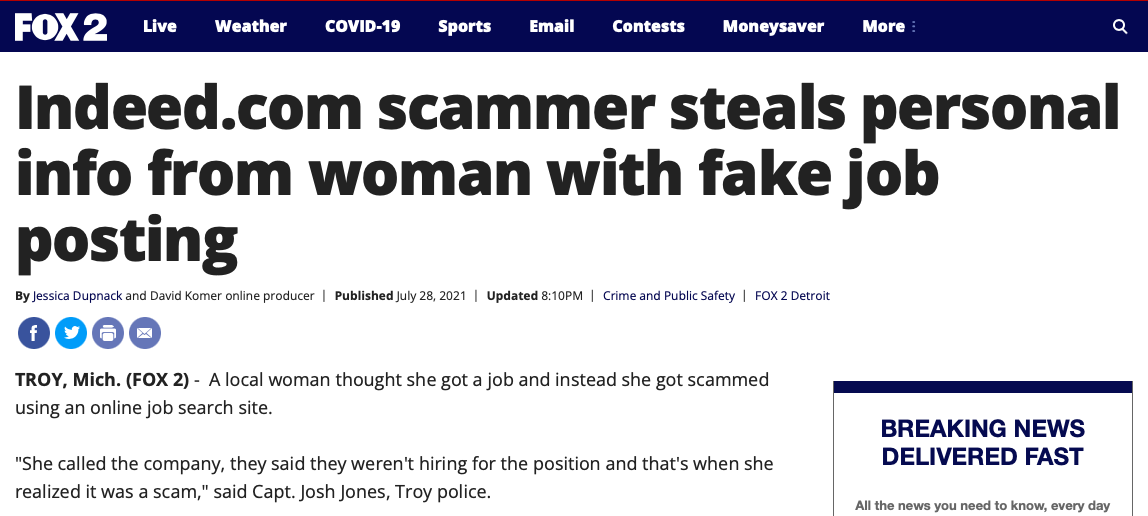

In [2]:
Image('../Images/Image4.png')

From : https://www.fox2detroit.com/news/indeed-com-scam-steals-personal-info-from-woman-with-fake-job-posting

## Dataset

In [3]:
df = pd.read_csv('../Data/20191031__30k_data.csv')

df.head()

,Job Title,Job Description,Job Type,Categories,Location,City,State,Country,Zip Code,Address,...,Employer Phone,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Chicago, IL",Chicago,IL,United States,NaN,NaN,...,NaN,NaN,Vibes Corp. reputation was built and establish...,NaN,NaN,NaN,United States,NaN,a0e0d12df1571962b785f17f43ceae12,2019-09-18 02:13:10 +0000
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Festus, MO",Festus,MO,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,56e411fd731f76ac916bf4fb169250e9,2019-10-24 16:39:13 +0000
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Staples is The Worklife Fulfillment Company, h...","Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,3fff5c0ad6981bf4bff6260bd5feab63,2019-08-24 22:29:10 +0000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           30002 non-null  object 
 1   Job Description     30002 non-null  object 
 2   Job Type            0 non-null      float64
 3   Categories          0 non-null      float64
 4   Location            30002 non-null  object 
 5   City                30002 non-null  object 
 6   State               30002 non-null  object 
 7   Country             30002 non-null  object 
 8   Zip Code            16252 non-null  object 
 9   Address             0 non-null      float64
 10  Salary From         0 non-null      float64
 11  Salary To           0 non-null      float64
 12  Salary Period       0 non-null      float64
 13  Apply Url           18392 non-null  object 
 14  Apply Email         0 non-null      float64
 15  Employees           0 non-null      float64
 16  Indu

### Drop all the 0 non-null since these wont provide information 

In [5]:
# Remove all the 0 non-null columns
df = df.dropna(axis = 1, how = 'all',inplace=False)
df.head(2)

,Job Title,Job Description,Location,City,State,Country,Zip Code,Apply Url,Company Name,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,Del Taco LLC,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,FOCUS Brands,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           30002 non-null  object
 1   Job Description     30002 non-null  object
 2   Location            30002 non-null  object
 3   City                30002 non-null  object
 4   State               30002 non-null  object
 5   Country             30002 non-null  object
 6   Zip Code            16252 non-null  object
 7   Apply Url           18392 non-null  object
 8   Company Name        30000 non-null  object
 9   Employer Logo       18708 non-null  object
 10  Companydescription  19662 non-null  object
 11  Employer Location   3348 non-null   object
 12  Employer City       3316 non-null   object
 13  Employer State      3316 non-null   object
 14  Employer Country    30002 non-null  object
 15  Employer Zip Code   1743 non-null   object
 16  Uniq Id             30

In [7]:
#Checking for missing values
df.isna().apply(pd.value_counts)

,Job Title,Job Description,Location,City,State,Country,Zip Code,Apply Url,Company Name,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
False,30002.0,30002.0,30002.0,30002.0,30002.0,30002.0,16252,18392,30000,18708,19662,3348,3316,3316,30002.0,1743,30002.0,30002.0
True,NaN,NaN,NaN,NaN,NaN,NaN,13750,11610,2,11294,10340,26654,26686,26686,NaN,28259,NaN,NaN


In [8]:
df['Job Title']

0                                           Shift Manager
1                              Operations Support Manager
2                           Senior Product Manager - Data
3                              Part-Time Office Concierge
4                             Print & Marketing Associate
                               ...                       
29997                                    Bilingual Teller
29998                    Rental Consultant - Harrison, OH
29999                        Product Support Specialist 5
30000                     Marketing Strategist (Contract)
30001    Business Intelligence Data Warehouse ETL Manager
Name: Job Title, Length: 30002, dtype: object

In [9]:
df.Location

0        Mission Hills, CA 91345
1              Atlanta, GA 30342
2                    Chicago, IL
3                     Festus, MO
4         Cedar Rapids, IA 52404
                  ...           
29997         Lakewood, CO 80226
29998         Harrison, OH 45030
29999        Melbourne, FL 32940
30000              San Diego, CA
30001              Jefferson, WI
Name: Location, Length: 30002, dtype: object

In [10]:
df['Apply Url']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4        https://retailcareers.staples.com/ShowJob/Id/7...
                               ...                        
29997    https://boards.greenhouse.io/moneytree33/jobs/...
29998                                                  NaN
29999    https://downtime4.adp.com/WorkforceNow/index.html
30000    https://chj.tbe.taleo.net/chj04/ats/careers/v2...
30001                                                  NaN
Name: Apply Url, Length: 30002, dtype: object

Maybe turn all urls to url, and all Nans to unknown

In [11]:
df['Company Name']

0                           Del Taco LLC
1                           FOCUS Brands
2                                  Vibes
3        Coldwell Banker Real Estate LLC
4                         Staples Stores
                      ...               
29997                          Moneytree
29998                     Circle Storage
29999                        SUN NUCLEAR
30000      Ajinomoto Bio-Pharma Services
30001                         NewCareers
Name: Company Name, Length: 30002, dtype: object

In [12]:
df['Employer Logo']

0        https://d2q79iu7y748jz.cloudfront.net/s/_squar...
1        https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
2                                                      NaN
3                                                      NaN
4        https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
                               ...                        
29997    https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
29998                                                  NaN
29999                                                  NaN
30000    https://d2q79iu7y748jz.cloudfront.net/s/_logo/...
30001                                                  NaN
Name: Employer Logo, Length: 30002, dtype: object

Add both dataset logo or nologo

In [13]:
df['Companydescription']

0        Del Taco is an American quick service restaura...
1        Based in Atlanta, FOCUS Brands Inc. is an inno...
2        Vibes Corp. reputation was built and establish...
3                                                      NaN
4        Staples is The Worklife Fulfillment Company, h...
                               ...                        
29997    Moneytree is a family-run business that has be...
29998                                                  NaN
29999                                                  NaN
30000    Ajinomoto Bio-Pharma Services is a fully integ...
30001    NewCareers is a full service executive/profess...
Name: Companydescription, Length: 30002, dtype: object

In [14]:
df['Company Name'].sort_values()

13883            #1 Pest Control
14117                      #6870
12849    #twiceasnice Recruiting
25455            & Other Stories
4556                  &Marketing
                  ...           
10516                  yorastore
18629                      zoovu
10762                        埃森哲
4110                         NaN
29110                        NaN
Name: Company Name, Length: 30002, dtype: object

In [15]:
df.loc[29110]

Job Title                               Knowledge Management Specialist
Job Description       <div id="jobDescriptionText" class="jobsearch-...
Location                                                     Duluth, GA
City                                                             Duluth
State                                                                GA
Country                                                   United States
Zip Code                                                            NaN
Apply Url             https://primerica.wd1.myworkdayjobs.com/en-US/...
Company Name                                                        NaN
Employer Logo                                                       NaN
Companydescription                                                  NaN
Employer Location                                                   NaN
Employer City                                                       NaN
Employer State                                                  

## Data Viz

<AxesSubplot:>

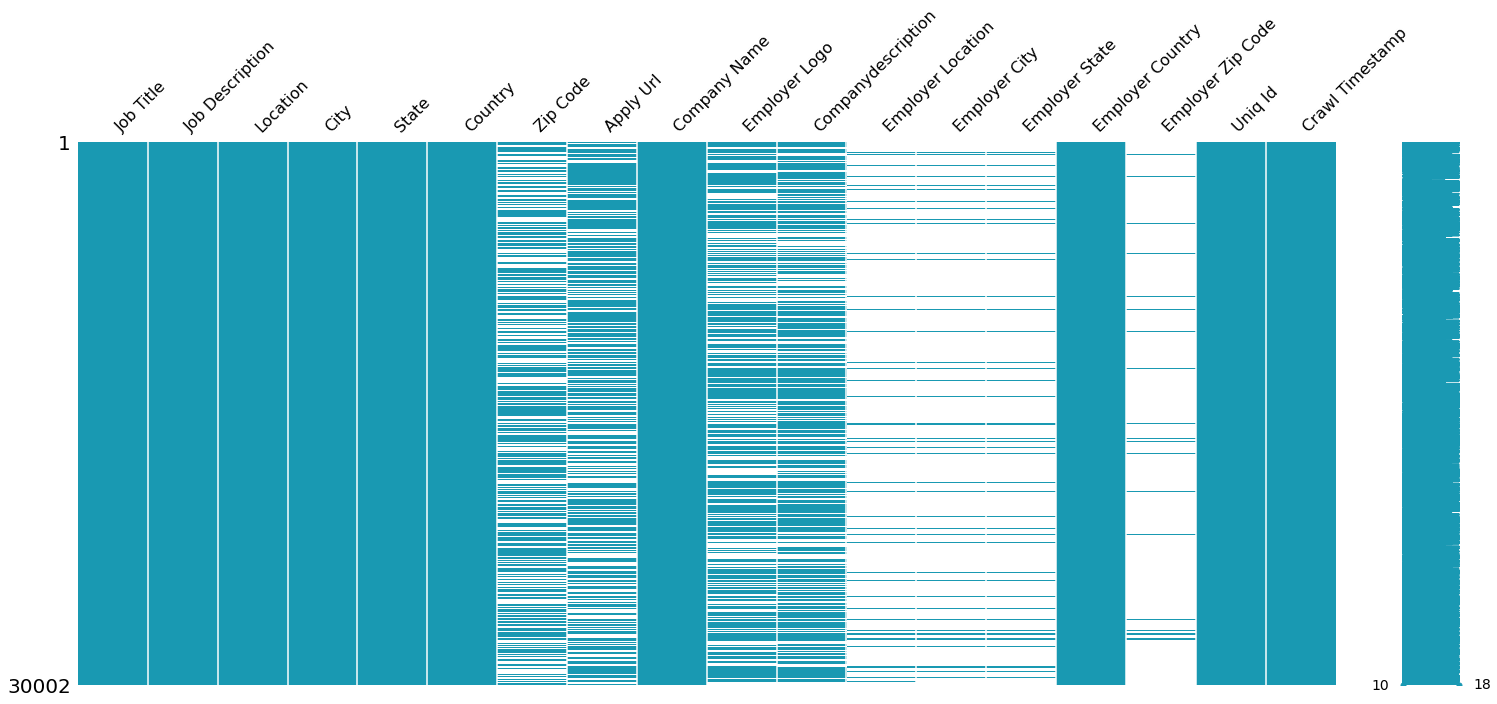

In [16]:
# checking missing data in our Indeed dataframe.
missingno.matrix(df,color=(0.1, 0.6, 0.7))

## Data Preparation

CompanyLogo / noCompanyLogo.... Companydescription  / Companyprofile


In [17]:
# Fill nulls with 'unknown'
df['Companydescription' ]= df['Companydescription'].fillna('unknown')

# Fill nulls with nocompanylogo or hascompanylogo
df['Employer Logo'] = df['Employer Logo'].notna()
df['Employer Logo'].replace({False:"nocompanylogo",True:'hascompanylogo'},inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30002 entries, 0 to 30001
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           30002 non-null  object
 1   Job Description     30002 non-null  object
 2   Location            30002 non-null  object
 3   City                30002 non-null  object
 4   State               30002 non-null  object
 5   Country             30002 non-null  object
 6   Zip Code            16252 non-null  object
 7   Apply Url           18392 non-null  object
 8   Company Name        30000 non-null  object
 9   Employer Logo       30002 non-null  object
 10  Companydescription  30002 non-null  object
 11  Employer Location   3348 non-null   object
 12  Employer City       3316 non-null   object
 13  Employer State      3316 non-null   object
 14  Employer Country    30002 non-null  object
 15  Employer Zip Code   1743 non-null   object
 16  Uniq Id             30

In [19]:
# Selecting specific columns for new text col
df['text'] = '  '+ df['Job Title'] +'  '+ df['Job Description'] +'  '+ df['Employer Logo']+'  '+ df['Companydescription'] + '  '
df.head(2)


,Job Title,Job Description,Location,City,State,Country,Zip Code,Apply Url,Company Name,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp,text
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,Del Taco LLC,hascompanylogo,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000,"Shift Manager <div id=""jobDescriptionText"" ..."
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...","Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,FOCUS Brands,hascompanylogo,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000,"Operations Support Manager <div id=""jobDesc..."


In [20]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [21]:
# Any text for guidance 
df.text[919]

'  Senior Scrum Master  <div id="jobDescriptionText" class="jobsearch-jobDescriptionText">\n<div>\n<div><b><i>Looking to be a part of an innovative team? If so read on...</i></b></div>\n<div></div>\n<div>The Underwriting Systems IT team is seeking a <b><i>Scrum Master</i></b> to lead a variety of compliance efforts. In this role, you will drive project management activities for a cross-functional scrum team with members from IT and the business and coordinate with multiple application areas to move our projects forward. You will also keep a healthy backlog so the team is always fully allocated. This is a great opportunity to gain a breadth of experience managing projects over multiple subject areas while supporting our business!\n</div>\n<div></div>\n<div><b>Candidate Qualifications:\n</b></div>\n<div></div>\n<ul>\n<li><div>Advance understanding and demonstrated professional experience with Agile Scrum is required\n</div></li>\n<li><div>Strong passion for improving processes that empow

In [22]:
# Turns everything lowercase
df.text = df.text.str.lower()

In [23]:
# removes numbers
df.text = df.text.apply(remove_number)

In [24]:
# removes weird symbols
df.text = df.text.apply(remove_symbols)

In [25]:
# Apply to the DF series
df.text = df.text.apply(remove_punctuations)
df.text = df.text.apply(remove_symbols)

In [26]:
# Prefer to have States caps
df.text = df['text'] + '  ' + df['State']+'  '


In [27]:
#Sample of what 'text' looks like after cleaning
df.text[9139]

'  branch sales   service representative  mlo     id                  h    jobsectionheader   position overview    h      at pnc  our people are our greatest differentiator and competitive advantage in the markets we serve  we are all united in delivering the best experience for our customers  as a branch sales and service representative  you will engage in proactive sales and customer service activities including teller transactions and developing referral opportunities  this position  within pnc s retail branch banking network  is based in  city state location of position  at the  branch name  branch        job description            delivers a unique customer experience aimed to improve a customer s financial wellbeing and create loyalty while increasing share of wallet  from a variety of customer interactions  participates in proactive sales and service activities and identifies referral opportunities  collaborates with ecosystem partners to grow customer s share of wallet  positio

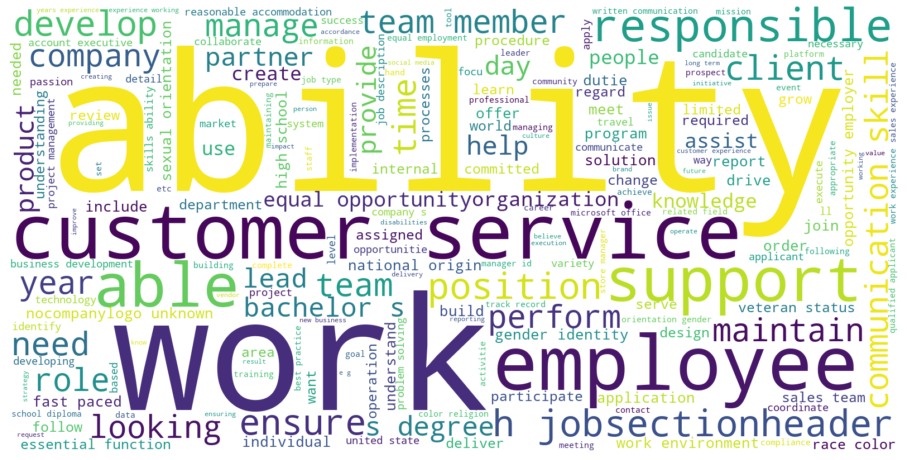

In [28]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  
               max_words = 200, 
               width = 1600, 
               height = 800,
               background_color='white',
               stopwords = STOPWORDS).generate(str(" ".join(df.text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis("off");

## Prep Indeed Dataset for testing

In [29]:
indeed = df.filter(['text'], axis=1)

indeed

,text
0,shift manager id we are lookin...
1,operations support manager id ...
2,senior product manager data id ...
3,part time office concierge id ...
4,print marketing associate id ...
...,...
29997,bilingual teller id a little a...
29998,rental consultant harrison oh id ...
29999,product support specialist id ...
30000,marketing strategist contract id ...


In [30]:
type(indeed)

pandas.core.frame.DataFrame

In [31]:
indeed.to_csv(r'../Data\indeed')

In [32]:
!ls ../Data

20191031__30k_data.csv fake_job_postings.csv  indeed


In [33]:
indeed = pd.read_csv('../Data/indeed', index_col=0)

In [34]:
indeed.loc[90].text

'  quant specialist sales  enterprise data sales     id                     we are bloomberg enterprise data   fast paced  innovative and fast growing  we have worked hard and smart to become the   b business we are today  we collaborate closely with our clients  taking the time to understand their unique businesses while focusing on specific data and technology needs  we have an endless selection of data sets covering all asset types  we have multiple delivery technologies  this allows our clients to get exactly the data they need  when they need it  in the format they prefer       h    jobsectionheader   what s the role    h    enterprise quant specialist sales covering buy side and sell side accounts in the americas  you will be part of a newly established audience based specialist team tasked to grow business footprints among quantitative and systematic trading firms  you will be responsible for the sales and retention of our quantitative data and technology suite of offerings  thi

### Indeed Dataset is ready now to be tested on my model